In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy import signal

def plot(time, frequency, y):
  fig,ax = plt.subplots(1,2,figsize=[15,6])
  ax[0].plot(time, y)
  ax[0].set_xlabel('Time (s)')
  ax[0].set_title('Time domain signal')

  ax[1].plot( frequency, np.abs(fft.fft(y))[:len(frequency)] )
  ax[1].set_xlabel('Frequency')
  ax[1].set_xlim([0,len(frequency) // 30])
  ax[1].set_title('Frequency domain signal')


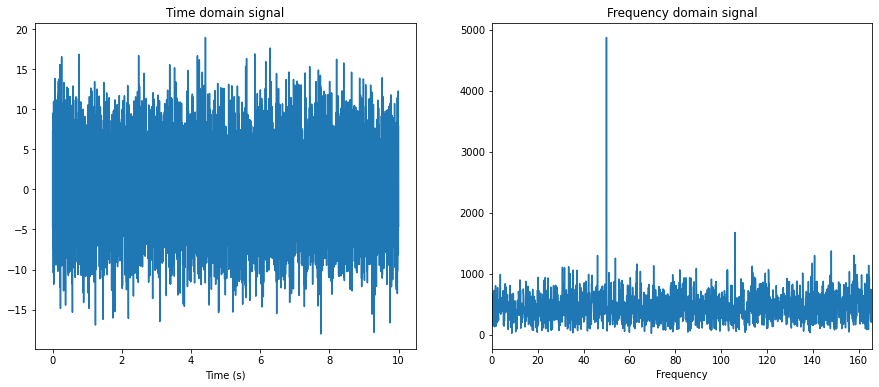

In [39]:
srate = 1_000
sigma = 5

t = np.arange(10*srate)/srate
N = len(t)

data = sigma * np.random.randn(N)
data += np.sin(2*np.pi*50*t)
frequency = np.linspace(0,srate/2,int(N/2) + 1)
plot(t, frequency, data)

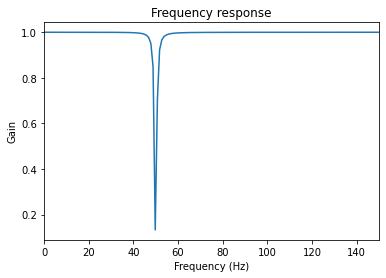

In [40]:
f0 = 50 # frequency to be notched out
q = 50 # quality of the filter
b,a = signal.iirnotch(f0,q,srate)
freq,h = signal.freqz(b,a,fs=srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])
plt.show()

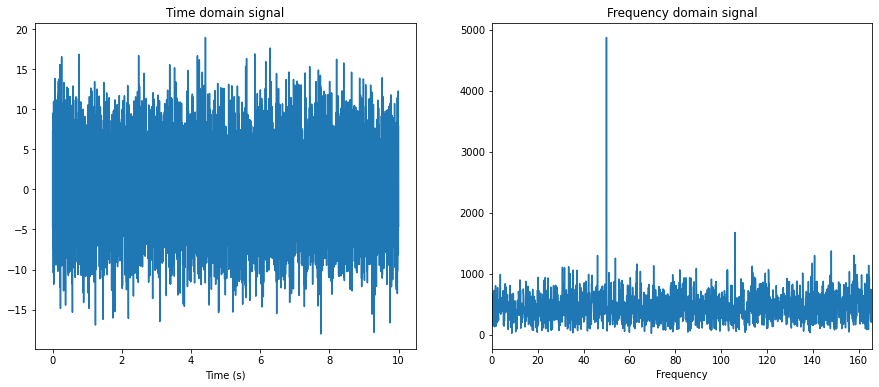

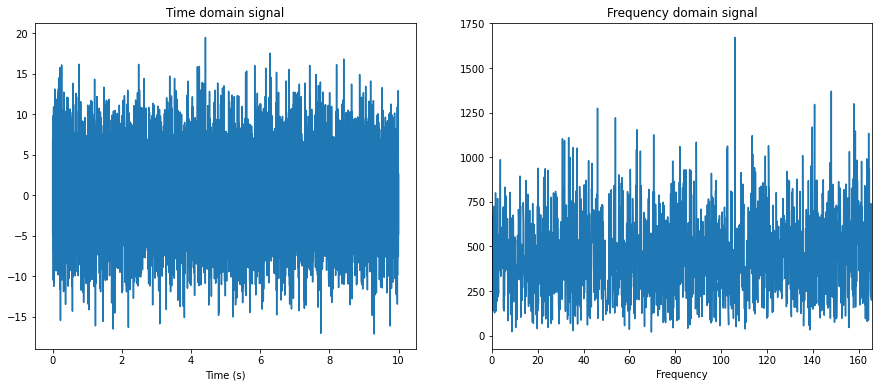

In [41]:
notched = signal.filtfilt(b,a,data)
plot(t, frequency, data)
plot(t, frequency, notched)

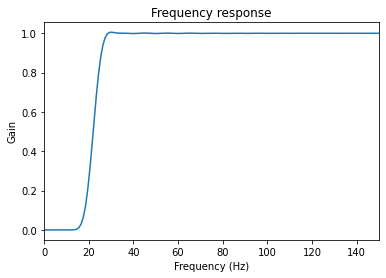

In [42]:
lowedge = 20
b = signal.firwin(lowedge*10+1,lowedge,fs=srate, pass_zero=False)
freq,h = signal.freqz(b,1,fs=srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Frequency response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])
plt.show()

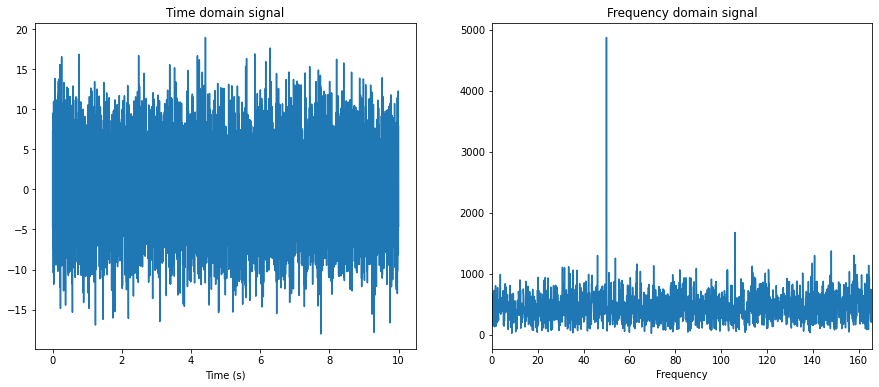

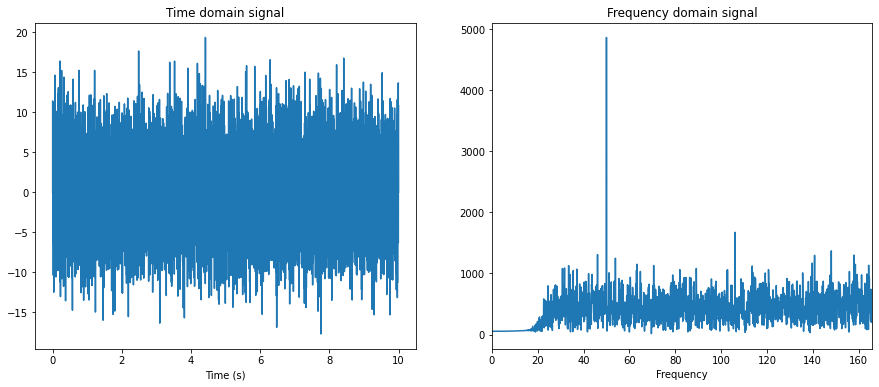

In [43]:
highpass = signal.filtfilt(b,1,data)
plot(t, frequency, data)
plot(t, frequency, highpass)